<a href="https://colab.research.google.com/github/EmilliAshleyMartinez/SIMULACION-1/blob/main/ACTIVIDAD10_MARTINEZPEREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 10

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10 minutos.

## Solución analítica
Vamos a resolver este ejercicio de forma geométrica.
Sean X  y Y las horas de llegada de dos personas. Se desea encontrar:

$$
P(|X - Y| \leq 10)
$$

Como X y Y son independientes y uniformes, el conjunto de posibles tiempos se representa como un cuadrado en el plano.

El área total del cuadrado, representa el área de probabilidad total:

$$
A_{\text{total}} = 30 \times 30 = 900
$$

Nuestra restricción de espera $|X - Y| \leq 10 $ describe una banda entre las rectas $ Y = X - 10 $ y  $Y = X + 10$, en al cuadrado del área total.

Las regiones fuera de esa banda corresponden a:

- Región inferior donde \( Y < X - 10 \)
- Región superior donde \( Y > X + 10 \)

Ambas son triángulos rectángulos de base y altura 20, así que su área combinada es:

$$
A_{\text{excluida}} = 2 \cdot \left( \frac{1}{2} \cdot 20 \cdot 20 \right) = 2 \cdot 200 = 400
$$

Entonces, el área de probabilidad de que el tiempo de espera sea menor a 10 min es igual al área total menos el área fuera de las bandas:

$$
A_{\text{espera}} = 900 - 400 = 500
$$

Finalmente, la probabilidad deseada es:

$$
P(|X - Y| \leq 10) = \frac{500}{900} = \frac{5}{9} \approx 0.5556
$$

## Simulación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

Función que define por una distribución uniforme un valor aleatorio entre 0 y 30 minutos para detrrminar el tiempo de llegada de persona 1 y persona 2. Posteriormente, obtiene la diferencia absoluta de estos tiempos y en caso de que la diferencia superé el límite de espera de 10 minutos retorna un valor 0, si no pasa el límite retorna un valor 1. Valores que posteriormente serán usados como "éxitos" del experimento.

In [ ]:
def llegadas():
  exitos=0
  persona1=np.random.uniform(0,30) #tiempo de llegada
  persona2=np.random.uniform(0,30)
  tiempoespera=np.abs(persona1-persona2) #calculo de tiempo de espera
  return (1 if tiempoespera <= 10 else 0) #límite de espera

Ciclo que define el número de veces que simularemos el experimento, donde:
`exitos` registra el valor de "1" y "0" obtenido de ejecutar la función `llegadas()` \\
`acumulado` realiza el conteo total de esos "1" y "0", que sería nuestro total de éxitos de las n simulaciones \\
`proba` determina la probabilidad por cada simulación



In [ ]:
valores = []
acumulado = 0
n = 1000  # n simulaciones

# Simulaciones para graficar convergencia
for i in range(1, n + 1):
    exito = llegadas()
    acumulado += exito
    proba = acumulado / i
    valores.append(proba) #valores guarda las probabilidades de n simulaciones acumuladas para graficar

Graficamos la convergencia de la probabilidad para n simulaciones

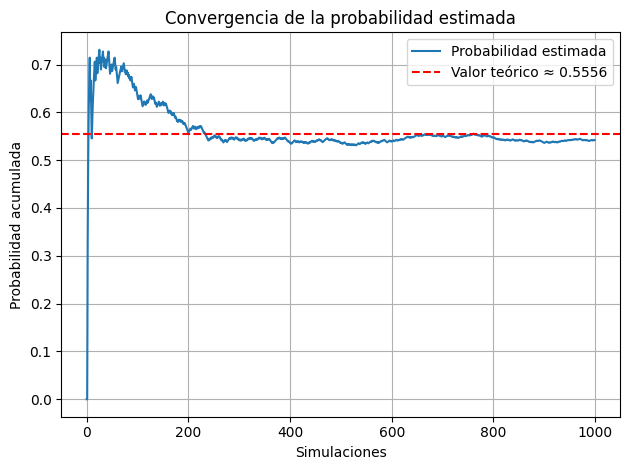

In [ ]:
plt.plot(valores, label='Probabilidad estimada') #probabilidades de n simulaciones
plt.axhline(5/9, color='red', linestyle='--', label='Valor teórico ≈ 0.5556') #valor estimado analiticamente
plt.title("Convergencia de la probabilidad estimada")
plt.xlabel("Simulaciones")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Por lo tanto, observamos que para varias simulaciones converge al 50% de probabilidad de que el tiempo de espera de una persona a otra sea de máximo 10 minutos.